In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import cv2

Using TensorFlow backend.


# Loading datatset

In [4]:
with open('trainX.pickle', 'rb') as f:
    trainX = pickle.load(f)
    
with open('trainY.pickle', 'rb') as f:
    trainY = pickle.load(f)
    
with open('testX.pickle', 'rb') as f:
    testX = pickle.load(f)

In [2]:
K.image_data_format()

'channels_last'

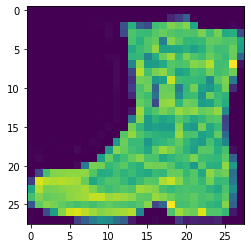

In [6]:
plt.imshow(trainX[150,:].reshape((28,28)))


# Defining model specifications

In [74]:
batch_size = 128
num_classes = 10
epochs =10

# Splitting dataset

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test,y_train,y_test= train_test_split(trainX,trainY,random_state=1)


# Scaling data and handling categorical values

In [77]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 300
x_test /= 300
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (45000, 28, 28)
45000 train samples
15000 test samples


# Reshaping data so that model can fit on it

In [78]:
x_train = np.reshape(x_train, (45000, 784))
x_test = np.reshape(x_test, (15000, 784))
x_train.shape

(45000, 784)

# Designing model

In [79]:
model = Sequential()

model.add(Dense(500, input_dim=784), )
model.add(Activation('relu'))
#model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_26 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 300)               150300    
_________________________________________________________________
activation_27 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                3010      
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


# Fitting model

In [80]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 7s 148us/step - loss: 0.6057 - acc: 0.7810 - val_loss: 0.5648 - val_acc: 0.7782
Epoch 2/10
45000/45000 [==============================] - 6s 136us/step - loss: 0.4098 - acc: 0.8502 - val_loss: 0.4001 - val_acc: 0.8483
Epoch 3/10
45000/45000 [==============================] - 6s 140us/step - loss: 0.3627 - acc: 0.8660 - val_loss: 0.3763 - val_acc: 0.8632
Epoch 4/10
45000/45000 [==============================] - 6s 137us/step - loss: 0.3302 - acc: 0.8774 - val_loss: 0.3742 - val_acc: 0.8569
Epoch 5/10
45000/45000 [==============================] - 6s 136us/step - loss: 0.3075 - acc: 0.8843 - val_loss: 0.3414 - val_acc: 0.8760
Epoch 6/10
45000/45000 [==============================] - 6s 135us/step - loss: 0.2911 - acc: 0.8898 - val_loss: 0.3848 - val_acc: 0.8556
Epoch 7/10
45000/45000 [==============================] - 6s 140us/step - loss: 0.2760 - acc: 0.8960 - val_loss: 0.3260 - 

In [ ]:
#Accuracy of this simple sequential model is 88.6
#Now we will design more advanced and efficient model

In [83]:
model = Sequential()
im_shape = (28,28,1)

model.add(Conv2D(32, (3, 3), padding="same",
input_shape=im_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

W0624 01:39:18.184894  3188 deprecation_wrapper.py:119] From c:\programdata\miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0624 01:39:18.329317  3188 deprecation_wrapper.py:119] From c:\programdata\miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [93]:
im_shape = (28,28,1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [86]:
#H = model.fit(trainX, trainY, validation_data=(test_X, test_Y), batch_size=128, epochs=10)
# test_X.shape
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 403s 9ms/step - loss: 0.5060 - acc: 0.8276 - val_loss: 0.3202 - val_acc: 0.8837
Epoch 2/10
45000/45000 [==============================] - 407s 9ms/step - loss: 0.3186 - acc: 0.8862 - val_loss: 0.3052 - val_acc: 0.8853
Epoch 3/10
45000/45000 [==============================] - 391s 9ms/step - loss: 0.2721 - acc: 0.9017 - val_loss: 0.2764 - val_acc: 0.8959
Epoch 4/10
45000/45000 [==============================] - 482s 11ms/step - loss: 0.2480 - acc: 0.9088 - val_loss: 0.2277 - val_acc: 0.9167
Epoch 5/10
45000/45000 [==============================] - 518s 12ms/step - loss: 0.2259 - acc: 0.9165 - val_loss: 0.2309 - val_acc: 0.9149
Epoch 6/10
45000/45000 [==============================] - 502s 11ms/step - loss: 0.2126 - acc: 0.9218 - val_loss: 0.2131 - val_acc: 0.9234
Epoch 7/10
45000/45000 [==============================] - 521s 12ms/step - loss: 0.2007 - acc: 0.9258 - val_loss: 0.251

In [91]:
preds = model.predict(x_test)
 
print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1449
           1       0.00      0.00      0.00      1544
           2       0.00      0.00      0.00      1529
           3       0.06      0.16      0.09      1492
           4       0.00      0.00      0.00      1464
           5       0.00      0.00      0.00      1504
           6       0.08      0.59      0.14      1480
           7       0.00      0.00      0.00      1530
           8       0.00      0.00      0.00      1482
           9       0.00      0.00      0.00      1526

    accuracy                           0.07     15000
   macro avg       0.01      0.08      0.02     15000
weighted avg       0.01      0.07      0.02     15000



In [94]:
Prediction = model.predict(testX)

In [95]:
with open("testY.pickle", 'wb') as f:
  pickle.dump(Prediction, f)